In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

In [2]:
def fun(x):
    return (1/(1+x**2))

In [3]:
def trapintegral(lower,upper,slices):
    h=(upper-lower)/slices
    xlist=np.linspace(lower,upper,slices+1)
    trapint=0.
    for i in range(0,slices+1):
        if (i==0 or i==slices):
            trapint=trapint+fun(xlist[i])
        else:
            trapint=trapint+2*fun(xlist[i])
    return trapint*h/2

In [4]:
#simpson rule
def simpson(a,b,n):
  z=[]
  h=(b-a)/n
  i=0
  k=a
  while(i<n):
    z.append(k)
    k=k+h
    i=i+1
  z.append(b)
  i=0
  y=[]
  while(i<=n):
    l=fun(z[i])
    y.append(l)
    i=i+1
  s=y[0]+y[n]
  j=1
  while(j<(n)):
    if((j%2)==1):
      s=s+(4*y[j])
    else:
      s=s+(2*y[j])
    j=j+1
  s=s*(h/3)
  return(s)

In [5]:
a=0
b=1
I = quad(fun,a,b)
N=[]
n=10
trap_integ=[]
simpson_integ=[]
while(n<=1000000):
  N.append(n)
  trap_integ.append(trapintegral(a,b,n))
  simpson_integ.append(simpson(a,b,n))
  n=n*10
l=I[0]
I=I[0]
trap_integ=np.array(trap_integ)
trap_error=abs(trap_integ-I)
simpson_integ=np.array(simpson_integ)
simpson_error=abs(simpson_integ-I)

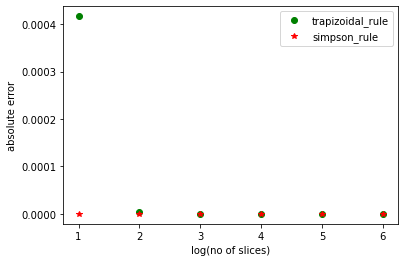

In [6]:
#plt.plot(np.log10(N),act,"o",color="blue")
plt.plot(np.log10(N),trap_error,"o",color="green",label="trapizoidal_rule")
plt.plot(np.log10(N),simpson_error,"*",color="red",label="simpson_rule")
plt.xlabel("log(no of slices)")
plt.ylabel("absolute error")
plt.legend()
plt.show()